<h1>Random Forest
<h3>Does not require scaling

In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.feature_selection import RFE
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt



In [2]:
train = pd.read_csv('train.csv', sep = ',')
validate = pd.read_csv('validate.csv', sep = ',')
test = pd.read_csv('test.csv', sep = ',')

<h3>Random forest on base model

In [3]:
feature_cols = [col for col in train.columns if (col != 'fraud')]
target_col = ['fraud']
X_train = train[feature_cols].copy()
y_train = train[target_col].copy()
X_validate = validate[feature_cols].copy()
y_validate = validate[target_col].copy()
X_test  = test[feature_cols].copy()
y_test  = test[target_col].copy()

forest = RandomForestClassifier()
forest.fit(X_train, y_train.values.ravel())

y_pred_train = forest.predict(X_train)
y_pred_validate = forest.predict(X_validate)
y_pred_test = forest.predict(X_test)

# Calculate precision, recall and f1-score for the training dataset
precision_train = precision_score(y_train, y_pred_train)
recall_train = recall_score(y_train, y_pred_train)
f1_score_train = f1_score(y_train, y_pred_train)

# Calculate precision, recall and f1-score for the validation dataset
precision_validate = precision_score(y_validate, y_pred_validate)
recall_validate = recall_score(y_validate, y_pred_validate)
f1_score_validate = f1_score(y_validate, y_pred_validate)

# Calculate precision, recall and f1-score for the test dataset
precision_test = precision_score(y_test, y_pred_test)
recall_test = recall_score(y_test, y_pred_test)
f1_score_test = f1_score(y_test, y_pred_test)

print('Precision over training dataset: {:0.4f}'.format(precision_train))
print('Precision over validation dataset: {:0.4f}'.format(precision_validate))
print('Precision over test dataset: {:0.4f}'.format(precision_test))
print('Recall over training dataset: {:0.4f}'.format(recall_train))
print('Recall over validation dataset: {:0.4f}'.format(recall_validate))
print('Recall over test dataset: {:0.4f}'.format(recall_test))
print('F1 score over training dataset: {:0.4f}'.format(f1_score_train))
print('F1 score over validation dataset: {:0.4f}'.format(f1_score_validate))
print('F1 score over test dataset: {:0.4f}'.format(f1_score_test))


Precision over training dataset: 1.0000
Precision over validation dataset: 0.9710
Precision over test dataset: 0.9670
Recall over training dataset: 1.0000
Recall over validation dataset: 0.9522
Recall over test dataset: 0.9489
F1 score over training dataset: 1.0000
F1 score over validation dataset: 0.9615
F1 score over test dataset: 0.9579


<h3> Random forest on 6 features

In [4]:
selected_features = ['trustLevel', 'totalScanTimeInSeconds', 'grandTotal', 'lineItemVoids', 'scansWithoutRegistration', 'totalItems']
feature_cols = [col for col in train.columns if (col != 'fraud')]
target_col = ['fraud']
X_train = train[feature_cols].copy()
y_train = train[target_col].copy()
X_validate = validate[feature_cols].copy()
y_validate = validate[target_col].copy()
X_test  = test[feature_cols].copy()
y_test  = test[target_col].copy()

forest = RandomForestClassifier()
forest.fit(X_train, y_train.values.ravel())

y_pred_train = forest.predict(X_train)
y_pred_validate = forest.predict(X_validate)
y_pred_test = forest.predict(X_test)

# Calculate precision, recall and f1-score for the training dataset
precision_train = precision_score(y_train, y_pred_train)
recall_train = recall_score(y_train, y_pred_train)
f1_score_train = f1_score(y_train, y_pred_train)

# Calculate precision, recall and f1-score for the validation dataset
precision_validate = precision_score(y_validate, y_pred_validate)
recall_validate = recall_score(y_validate, y_pred_validate)
f1_score_validate = f1_score(y_validate, y_pred_validate)

# Calculate precision, recall and f1-score for the test dataset
precision_test = precision_score(y_test, y_pred_test)
recall_test = recall_score(y_test, y_pred_test)
f1_score_test = f1_score(y_test, y_pred_test)

print('Precision over training dataset: {:0.4f}'.format(precision_train))
print('Precision over validation dataset: {:0.4f}'.format(precision_validate))
print('Precision over test dataset: {:0.4f}'.format(precision_test))
print('Recall over training dataset: {:0.4f}'.format(recall_train))
print('Recall over validation dataset: {:0.4f}'.format(recall_validate))
print('Recall over test dataset: {:0.4f}'.format(recall_test))
print('F1 score over training dataset: {:0.4f}'.format(f1_score_train))
print('F1 score over validation dataset: {:0.4f}'.format(f1_score_validate))
print('F1 score over test dataset: {:0.4f}'.format(f1_score_test))

Precision over training dataset: 1.0000
Precision over validation dataset: 0.9698
Precision over test dataset: 0.9682
Recall over training dataset: 1.0000
Recall over validation dataset: 0.9522
Recall over test dataset: 0.9468
F1 score over training dataset: 1.0000
F1 score over validation dataset: 0.9609
F1 score over test dataset: 0.9574


<h3>Complex trees are more likely to overfit -- deeper tree can capture more intricate patterns but is more prone to overfitting

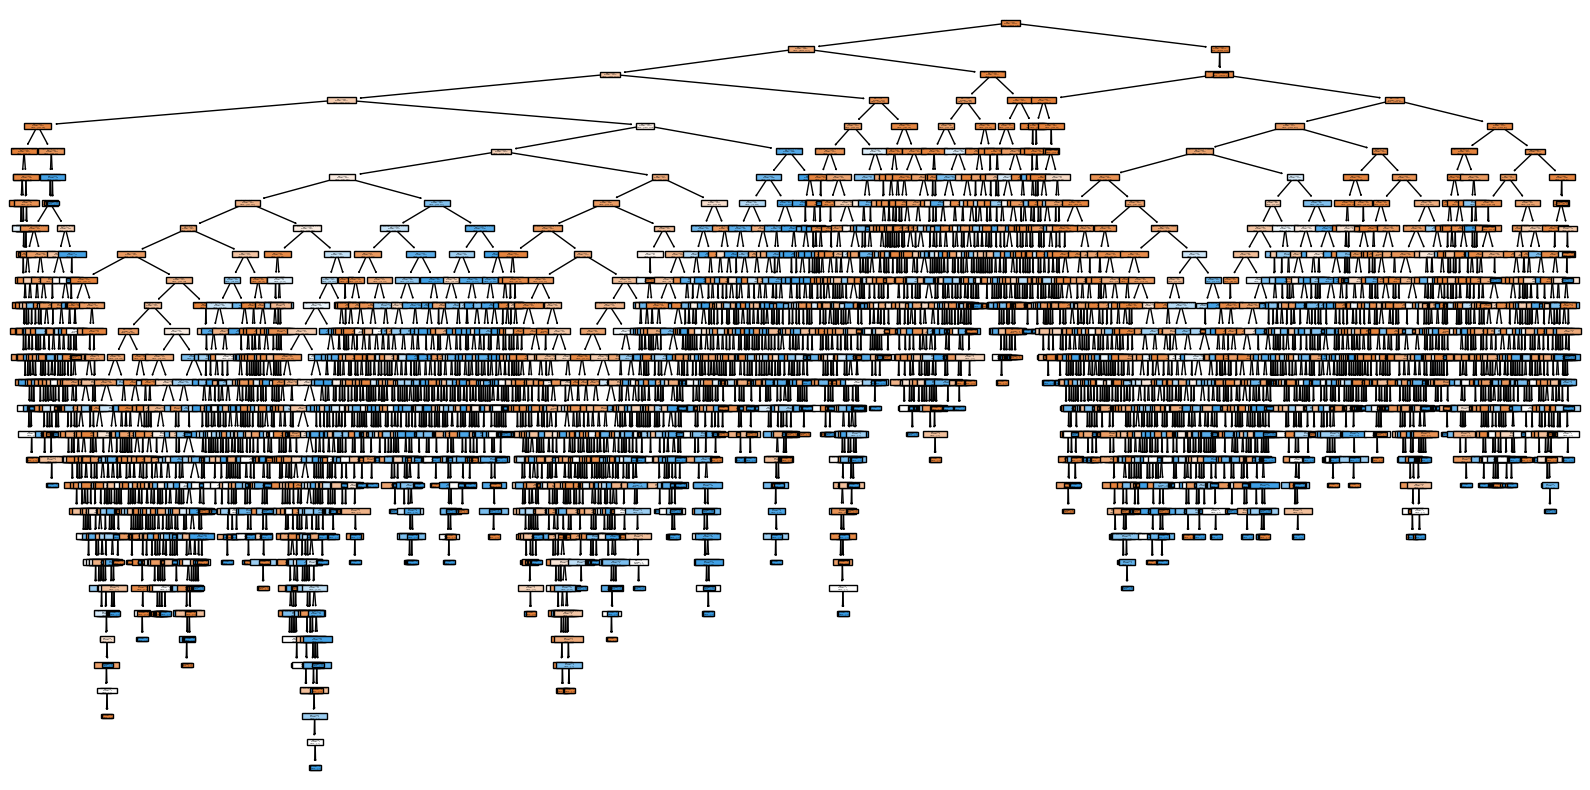

In [5]:
# Assuming 'forest' is your trained RandomForestClassifier
plt.figure(figsize=(20, 10))  # Adjust figure size as needed
plot_tree(forest.estimators_[0], feature_names=feature_cols, filled=True)
plt.show()

In [6]:
train['totalItems'] = train['totalScanTimeInSeconds'] * train['scannedLineItemsPerSecond']
validate['totalItems'] = validate['totalScanTimeInSeconds'] * validate['scannedLineItemsPerSecond']
test['totalItems'] = test['totalScanTimeInSeconds'] * test['scannedLineItemsPerSecond']

<h3>Hyperparameter tuning since there's a possibility of overfitting

<h5>Find the current parameters used by random forest

In [7]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state = 42)
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


<h3>Random search for hyperparameter tuning

In [8]:
selected_features = ['trustLevel', 'totalScanTimeInSeconds', 'grandTotal', 'lineItemVoids', 'scansWithoutRegistration', 'totalItems']
target_col = ['fraud']
X_train = train[feature_cols].copy()
y_train = train[target_col].copy()
X_validate = validate[feature_cols].copy()
y_validate = validate[target_col].copy()
X_test  = test[feature_cols].copy()
y_test  = test[target_col].copy()

# Define the Random Forest classifier
forest = RandomForestClassifier()

# Define the hyperparameter grid
param_dist = {
    'n_estimators': randint(100, 1000), 
    'max_depth': randint(3, 10), 
    'min_samples_split': randint(2, 20), 
    'min_samples_leaf': randint(1, 20), 
    'max_features': [1,2,3]
}

# Perform Randomized Search with cross-validation
random_search = RandomizedSearchCV(
    forest, param_distributions=param_dist, n_iter=20, cv=5, scoring='f1', random_state=42, n_jobs=-1
)

# Fit the Randomized Search to find the best hyperparameters
random_search.fit(X_train, y_train.values.ravel())

# Print the best hyperparameters and their corresponding score
print("Best Parameters: ", random_search.best_params_)
print("Best F1 Score: ", random_search.best_score_)

# Evaluate the best model on the validation set using F1 score
best_model = random_search.best_estimator_
validation_pred = best_model.predict(X_validate)
validation_f1 = f1_score(y_validate, validation_pred)
print("Validation F1 Score of Best Model: ", validation_f1)

# Evaluate the best model on the test set using F1 score
test_pred = best_model.predict(X_test)
test_f1 = f1_score(y_test, test_pred)
print("Test F1 Score of Best Model: ", test_f1)


Best Parameters:  {'max_depth': 9, 'max_features': 2, 'min_samples_leaf': 8, 'min_samples_split': 17, 'n_estimators': 848}
Best F1 Score:  0.73518563055136
Validation F1 Score of Best Model:  0.7401774397972116
Test F1 Score of Best Model:  0.7438417014403016


In [10]:
selected_features = ['trustLevel', 'totalScanTimeInSeconds', 'grandTotal', 'lineItemVoids', 'scansWithoutRegistration', 'totalItems']

feature_cols = [col for col in selected_features]
target_col = ['fraud']
X_train = train[feature_cols].copy()
y_train = train[target_col].copy()
X_validate = validate[feature_cols].copy()
y_validate = validate[target_col].copy()
X_test = test[feature_cols].copy()
y_test = test[target_col].copy()

# Define the best parameters obtained from hyperparameter tuning
best_params = {'max_depth': 9, 'max_features': 2, 'min_samples_leaf': 8, 'min_samples_split': 17, 'n_estimators': 848}
# Initialize the Random Forest classifier with the best parameters
forest_best_params = RandomForestClassifier(**best_params)
forest_best_params.fit(X_train, y_train.values.ravel())

# Predictions on the training set
y_pred_train = forest_best_params.predict(X_train)
y_pred_validate = forest_best_params.predict(X_validate)
y_pred_test = forest_best_params.predict(X_test)

# Calculate precision, recall, and F1-score for the training dataset
precision_train = precision_score(y_train, y_pred_train)
recall_train = recall_score(y_train, y_pred_train)
f1_score_train = f1_score(y_train, y_pred_train)

# Calculate precision, recall, and F1-score for the validation dataset
precision_validate = precision_score(y_validate, y_pred_validate)
recall_validate = recall_score(y_validate, y_pred_validate)
f1_score_validate = f1_score(y_validate, y_pred_validate)

# Calculate precision, recall, and F1-score for the test dataset
precision_test = precision_score(y_test, y_pred_test)
recall_test = recall_score(y_test, y_pred_test)
f1_score_test = f1_score(y_test, y_pred_test)

print('Precision over training dataset: {:0.4f}'.format(precision_train))
print('Precision over validation dataset: {:0.4f}'.format(precision_validate))
print('Precision over test dataset: {:0.4f}'.format(precision_test))
print('Recall over training dataset: {:0.4f}'.format(recall_train))
print('Recall over validation dataset: {:0.4f}'.format(recall_validate))
print('Recall over test dataset: {:0.4f}'.format(recall_test))
print('F1 score over training dataset: {:0.4f}'.format(f1_score_train))
print('F1 score over validation dataset: {:0.4f}'.format(f1_score_validate))
print('F1 score over test dataset: {:0.4f}'.format(f1_score_test))

Precision over training dataset: 0.9685
Precision over validation dataset: 0.9625
Precision over test dataset: 0.9624
Recall over training dataset: 0.9347
Recall over validation dataset: 0.9185
Recall over test dataset: 0.9189
F1 score over training dataset: 0.9513
F1 score over validation dataset: 0.9399
F1 score over test dataset: 0.9401


<h3>Tree looks less complex now

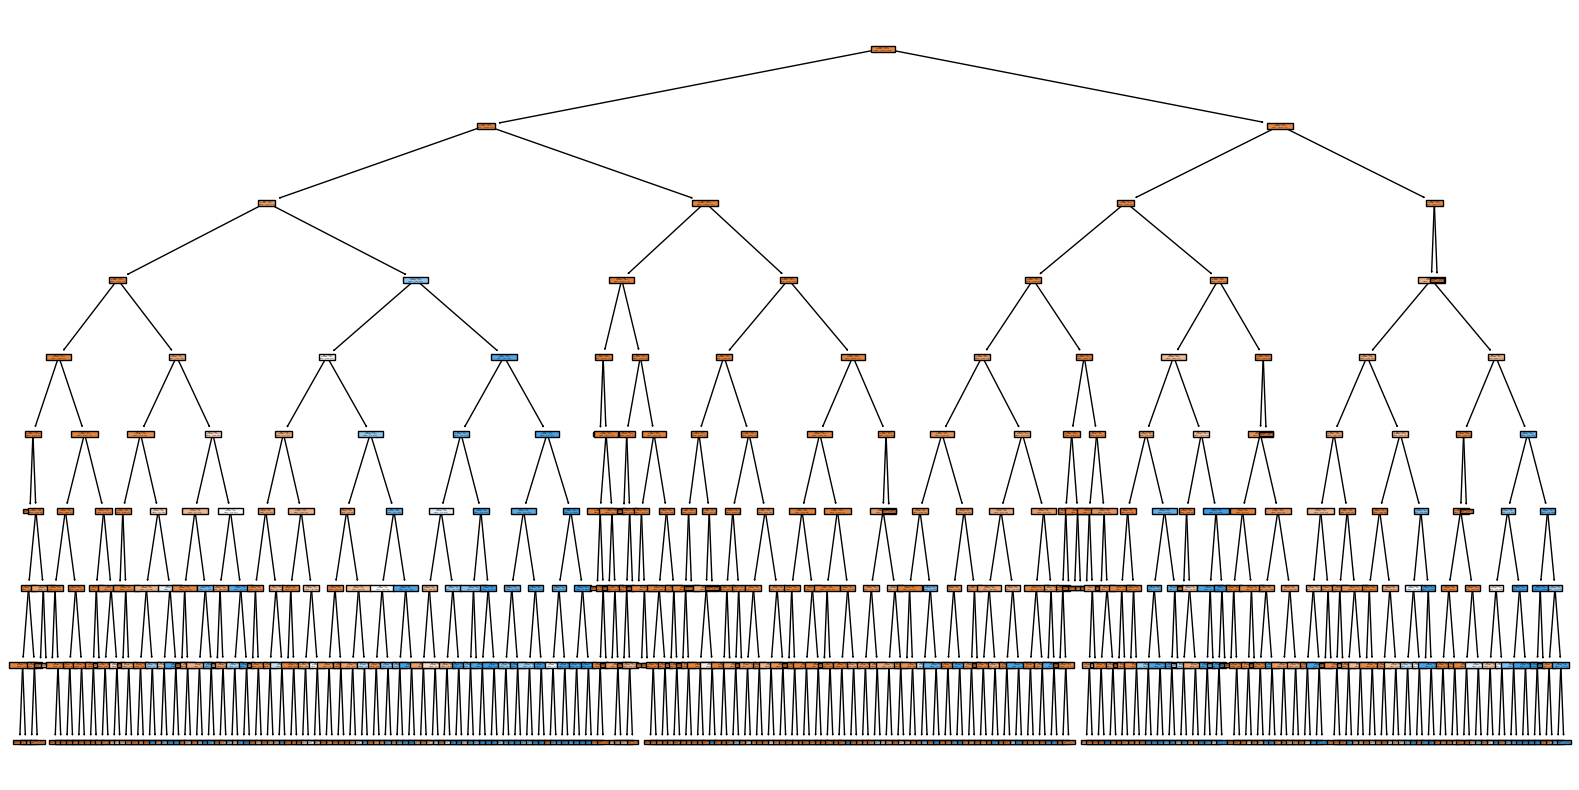

In [11]:

# Assuming 'forest' is your trained RandomForestClassifier
plt.figure(figsize=(20, 10))  # Adjust figure size as needed
plot_tree(forest_best_params.estimators_[0], feature_names=feature_cols, filled=True)
plt.show()
